# Chapter 8: Orthogonality
## Originally created by Clare Minnerath

**This Jupyter notebook is a part of a linear algebra tutorial created by Sara Billey's 2024 WXML group. It follows Chapter 8 of  Holt's Linear Algebra with applications. [1] which explores orthogonality and new ways to decompose a matrix into more easily understood chunks. It is intended as a supplement to the UW Math 208 course. The user is encouraged to explore beyond the scope of this notebook as interested.**

Note: This notebook primarily uses Sage linear algebra libraries. However, the Single Value Decomposition (SVD) application to image compression utiilizes python's numpy library. Also, methods such as Gram-Schmidt and QR factorization are available built in as Sage functions, but functions are written out in this tutorial to be compared with the text's algorithms.

<span> 1. Holt, J. \(2017\)._Linear algebra with applications_.</span>\
<span> 2. Cat image from Clare Minnerath: image of family cat Egg. </span>\
<span> 3. Dog image from Sara Billey: image of painting by Sara's uncle of her dog Valentine. </span>

<span style='font-size:medium'>Two vectors in </span>$\R^n$<span style='font-size:medium'> are orthogonal if their dot product is equal to 0. </span>
<span style='font-size:medium'>The magnitude (or norm) of a vector is given by </span>$||x|| = \sqrt{x\cdot x}$<span style='font-size:medium'>.</span>


In [3]:
u=vector([2,-1,5,-2])
v=vector([3,2,-4,0])
w=vector([2,9,6,4])

# computing dot products
print("u\u2022v = ", u.dot_product(v))
print("v\u2022w = ", v.dot_product(w), "\n")

print("||v|| = ", v.norm())

u•v =  -16
v•w =  0 

||v|| =  sqrt(29)


In [4]:
zero = vector([0,0,0])
u=vector([2,-1,-3])
v=vector([3,2,-4])
w=vector([2,9,6])

# compute dot products and visualize normalized vectors
print("u\u2022v = ", u.dot_product(v))
print("v\u2022w = ", v.dot_product(w))

# normalizing scales the vectors to magnitude 1
plot = (arrow(zero, u.normalized(), color="red") + 
    arrow(zero, v.normalized(), color="purple") + arrow(zero, w.normalized()))
plot.show()

u•v =  16
v•w =  0


Graphics3d Object

<span style='font-size:medium'>Since the Pathagorean Theorem only holds for right triangles, it follows that </span>$||u+v||^2 = ||u||^2 + ||v||^2$<span style='font-size:medium'> if and only if </span>$u\cdot v=0$<span style='font-size:medium'>. The Triangle Inequality, </span>$||u+v|| \le ||u|| + ||v||$<span style='font-size:medium'>, holds for all vectors </span>$u$<span style='font-size:medium'> and </span>$v$<span style='font-size:medium'>.</span>


In [5]:
# .norm() comutes the magnitude (norm) of the vector
print("Pathagorian Theorem: ", (v+w).norm()^2, "=", v.norm()^2 + w.norm()^2)
print("Triangle Inequality: ", round((u+v).norm(), 3), "<", round(u.norm() + v.norm(),3))

Pathagorian Theorem:  150 = 150
Triangle Inequality:  8.66 < 9.127


<span style='font-size:medium'>An orthogonal basis, </span>$\{v_1,...,v_n\}$<span style='font-size:medium'>, is a basis for a subspace such that all of the basis vectors are orthogonal \(</span>$v_i\cdot v_j=0$<span style='font-size:medium'> whenever </span>$i\ne j$<span style='font-size:medium'>\). Given such a basis, any vector, </span>$s$<span style='font-size:medium'>, in the subspace can be expressed as </span>$$s = c_1v_1+\cdots + c_kv_k$$<span style='font-size:medium'> where </span>$c_i = \frac{v_i\cdot s}{||v_i||^2}$<span style='font-size:medium'>. Recalling that </span>$ \frac{v\cdot s}{||v||^2}v = \text{proj}_vs$, we can also express the formula as $$s =  \text{proj}_{v_1}s + \text{proj}_{v_2}s + \cdots + \text{proj}_{v_k}s.$$


In [6]:
u_1 = vector([1,2,0,-1])
u_2 = vector([5,2,4,9])
u_3 = vector([-2,2,-3,2])

# checks that the dot product of all vectors in basis equal 0.
if u_1.dot_product(u_2) == u_2.dot_product(u_3) == u_1.dot_product(u_3) == 0:
    print("The basis {u_1, u_2, u_3} are an orthogonal basis for span{u_1, u_2, u_3}.")

The basis {u_1, u_2, u_3} are an orthogonal basis for span{u_1, u_2, u_3}.


In [7]:
s = vector([19,4,17,51])    # s is in span{u_1,u_2,u_3}

# Find coeffcients to express s as a linear combination of {u_1, u_2, u_3}
c_1 = s.dot_product(u_1)/u_1.norm()^2
c_2 = s.dot_product(u_2)/u_2.norm()^2
c_3 = s.dot_product(u_3)/u_3.norm()^2

if s == c_1*u_1 + c_2*u_2 + c_3*u_3:
    print("As expected: ", s, " = ", c_1, u_1, " + ", c_2, u_2, " + ", c_3, u_3)

As expected:  (19, 4, 17, 51)  =  -4 (1, 2, 0, -1)  +  5 (5, 2, 4, 9)  +  1 (-2, 2, -3, 2)


<span style='font-size:medium'>The Gram\-Schmit Process is a method for transforming a basis for a subspace into an orthogonal basis for that subspace. The following function performs said algorithm, but more details can be found in section 8.2 of \[1\].</span>


In [8]:
def Gram_Schmidt(B):
    """
    This function take in an orthogonal basis, B, for
    a subspace and outputs the corresponding orthogonal
    basis for the subspace using the Gram-Schmidt process.
    (Note: This function does not handle errors)
    
    Inputs:
    -------
    B : List of vectors
    
    Outputs:
    --------
    O : List of vectors
    """
    O = []
    for i, v_i in enumerate(B):
        orth_v = v_i - sum([(v_i.dot_product(O[j])/O[j].norm()^2)*O[j] for j in range(i)])    # utilizing projection formula
        O.append(orth_v)
        
    return O

In [9]:
B = [vector([1,0,1,1]), vector([0,2,0,3]), vector([-3,-1,1,5])]
Gram_Schmidt(B)

# try this yourself using a larger basis that would be too difficult to compute by hand!
# B = []

[(1, 0, 1, 1), (-1, 2, -1, 2), (-3, -3, 1, 2)]

<span style='font-size:medium'>An orthogonal matrix is a square matrix with unit length mutually orthogonal columns as well as unit length mutually orthogonal rows. A matrix, </span>$A$<span style='font-size:medium'>, is orthogonally diagonalizable if there exists an orthogonal matrix, </span>$P$<span style='font-size:medium'>, and a diagonal matrix, </span>$D$<span style='font-size:medium'>, such that </span>$A = PDP^{-1}$<span style='font-size:medium'>. The Spectral Theorem from section 8.3 \[1\], tells us that a matrix is orthogonally diagonalizable if and only if the matrix is symmetric. What a result! The following function takes a symmetric matrix and outputs corresponding orthogonal and diagonal matrices. In particular, this function will make use of the previous Gram\-Schmidt process.</span>


In [10]:
def orthogonal_diagonalization(A):
    """
    This function takes in a symmetric matrix, A, and
    outputs orthogonal and diagonal matrices which
    orthogonally diagonalize A.
    
    Inputs: 
    -------
    A : matrix (symmetric)
    
    Outputs:
    --------
    matrix: A diagonal matrix 
    matrix: an orthogonal (optionally orthonormal) matrix
    """
    if A.transpose() != A:
        raise ValueError("orthogonal_diagonalization only accepts symmetric matrices")
        
    O = []
    
    # sort to look at eigen vectors from largest to smallest eigenvalue
    # this will be important when using (SVD)
    for _, eigen_vectors, num_vectors in sorted(A.eigenvectors_right(), reverse=True):
        if num_vectors > 1:
            O.extend(Gram_Schmidt(eigen_vectors))    # if an eigen value has multiplicity, we need to 
                                                         # find an orthogonal basis for the multiple eigen vectors.
        else:
            O.extend(eigen_vectors)
    
    # normalize matrix vectors
    norm_O = []
    for vector in O:
        norm_O.append(vector.normalized())
        
    return matrix.diagonal(sorted(A.eigenvalues(), reverse=True)), matrix(norm_O).transpose()

In [11]:
A = matrix(SR, [[1,3,-3,-3],[3,-3,3,-1],[-3,3,1,-3],[-3,-1,-3,-3]])

D, P = orthogonal_diagonalization(A)

if A == P*D*P.inverse():
    print(A, " is orthogonally diagonalized by the orthogonal matrix\n\n", P, " and the diagonal matrix\n\n", D)
    
# try this yourself with your own symmetric matrix!
# A = matrix([[]])

[ 1  3 -3 -3]
[ 3 -3  3 -1]
[-3  3  1 -3]
[-3 -1 -3 -3]  is orthogonally diagonalized by the orthogonal matrix

 [ 1/2*sqrt(2)          1/2            0          1/2]
[           0          1/2  1/2*sqrt(2)         -1/2]
[-1/2*sqrt(2)          1/2            0          1/2]
[           0         -1/2  1/2*sqrt(2)          1/2]  and the diagonal matrix

 [ 4  0  0  0]
[ 0  4  0  0]
[ 0  0 -4  0]
[ 0  0  0 -8]


<span style='font-size:medium'>In the more general case where we have an </span>$n\times m$<span style='font-size:medium'> matrix </span>$A$<span style='font-size:medium'> with linearly independent columns, we can factorize by </span>$A = QR$<span style='font-size:medium'> where </span>$Q$<span style='font-size:medium'> is an orthonormal </span>$n\times m$<span style='font-size:medium'> matrix and </span>$R$<span style='font-size:medium'> is an </span>$m\times m$<span style='font-size:medium'> upper triangular matrix with positive diagonal entires. This method is known as QR Factorization. The following function takes a matrix with linearly independent columns and outputs the corresponding orthonormal and upper triangular matrices. See section 8.3 \[1\] for more details.</span>


In [12]:
def QR_factorization(A):
    """
    This function takes in a matrix, A, with linearly indep.
    columns and outputs orthonormal and upper triangular matrices 
    which QR factorize A.
    
    Inputs: 
    -------
    A : matrix (linearly indpendent columns)
    
    Outputs:
    --------
    matrix : orthonormal matrix 
    matrix: upper triangular matrix with positive diagonal
    """
    norm_O = [v.normalized() for v in Gram_Schmidt(A.columns())]    # normalize orthogonal basis
    Q_transpose = matrix(norm_O)    # when defining Q with column vectors, the matrix returned is the transpose of Q
    
    return Q_transpose.transpose(), Q_transpose*A

In [13]:
# Note: matrix A uses the same vectors as the previous Gram-Schmidt example.
A = matrix([[1,0,-3],[0,2,-1],[1,0,1],[1,3,5]])

Q, R = QR_factorization(A)

if A == Q*R:
    print(A, " is QR factorized by the orthonormal matrix\n\n", Q, " and the upper triangular matrix with positive diagonal matrix\n\n", R)
        
# try this yourself with your own matrix!
# A = matrix([])

[ 1  0 -3]
[ 0  2 -1]
[ 1  0  1]
[ 1  3  5]  is QR factorized by the orthonormal matrix

 [   1/3*sqrt(3) -1/10*sqrt(10) -3/23*sqrt(23)]
[             0   1/5*sqrt(10) -3/23*sqrt(23)]
[   1/3*sqrt(3) -1/10*sqrt(10)  1/23*sqrt(23)]
[   1/3*sqrt(3)   1/5*sqrt(10)  2/23*sqrt(23)]  and the upper triangular matrix with positive diagonal matrix

 [ sqrt(3)  sqrt(3)  sqrt(3)]
[       0 sqrt(10) sqrt(10)]
[       0        0 sqrt(23)]


<span style='font-size:medium'>An even more general factorization is singular value decomposition \(SVD\). SVD can be applied to any </span>$n\times m$<span style='font-size:medium'> matrix and decomposes the matrix into </span>$U\Sigma V^T$<span style='font-size:medium'> where </span>$U$<span style='font-size:medium'> is an </span>$n\times n$<span style='font-size:medium'> orthogonal matrix, </span>$\Sigma$<span style='font-size:medium'> is a diagonal matrix padded with 0's, and </span>$V$<span style='font-size:medium'> is an </span>$m\times m$<span style='font-size:medium'> orthogonal matrix. More specific details on the decomposition can be found in section 8.4 \[1\]. The following function implements \(SVD\) for any </span>$n\times m$<span style='font-size:medium'> matrix.</span>


In [14]:
def SVD(B):
    """
    This function takes in any n x m matrix, B, and outputs an orthonormal n x n matrix,
    a padded diagonal matrix and another orthonormal m x m matrix which factorize B.
    
    Inputs: 
    -------
    B : matrix
    
    Outputs:
    --------
    matrix : n x n orthonormal matrix
    matrix : diagonal matrix padded to be n x m
    matrix : m x m orthonormal matrix
    """
    # apply algorithm on matrix with at least as many rows as columns
    if B.nrows() < B.ncols():
        A = B.transpose()
    else:
        A = B
       
    D,V = orthogonal_diagonalization(A.transpose()*A)
    root_D = D.principal_square_root()
    
    # pad diagonal matrix
    S = root_D.stack(matrix(0, nrows=A.nrows()-A.ncols(), ncols=A.ncols()))
        
    U = []    
    for i, s in enumerate(S.diagonal()):
        U.append((A*V.column(i)/s).normalized())
    for v in A.kernel().basis():
        U.append(v.normalized())
    
    # return based on whether functoin ran on transpose
    if A == B:
        return matrix(U).transpose(), S, V.transpose()
    else:
        return V, S.transpose(), matrix(U)

In [15]:
A = matrix([[1,2],[2,0],[0,2]])
U, S, V_transpose = SVD(A)

print(A, " = A\n")
print(U*S*V_transpose, " = USV^T\n")

B = matrix([[1,2,1,0],[2,0,1,1]])
U, S, V_transpose = SVD(B)

print(B, " = B\n")
print(U*S*V_transpose, " = USV^T\n")

# try this yourself with your own matrix!
# C = matrix([])

[1 2]
[2 0]
[0 2]  = A

[1 2]
[2 0]
[0 2]  = USV^T

[1 2 1 0]
[2 0 1 1]  = B

[1 2 1 0]
[2 0 1 1]  = USV^T



<span style='font-size:medium'>SVD has applications in image compression. We can express an </span>$n \times m$<span style='font-size:medium'> matrix, </span>$A$<span style='font-size:medium'>, with the following sum </span>
$$ 
A = \alpha_1u_1v_1 + \alpha_2u_2v_2 + \cdots \alpha_nu_nv_n
$$
<span style='font-size:medium'>where </span>$u_i$<span style='font-size:medium'> is a column vector of </span>$U$<span style='font-size:medium'>, </span>$v_i$<span style='font-size:medium'> is a row vector of </span>$V^T$<span style='font-size:medium'>, and the </span>$\alpha_1\ge \alpha_2 \ge \cdots \ge \alpha_n$<span style='font-size:medium'> come from the diagonal of </span>$\Sigma$<span style='font-size:medium'> in the </span>$SVD$<span style='font-size:medium'> decomposition of </span>$A$<span style='font-size:medium'>. The product used between $u_i$ and $v_i$ in the expansion is the outer product. Since the </span>$\alpha_i$<span style='font-size:medium'> are decreasing, taking the sum with only the first </span>$k$<span style='font-size:medium'> terms  can still give us a good approximation of the original matrix. See section 8.4 \[1\] for more details. We show the results of this application below utilizing python's numpy library.</span>


In [16]:
# import image into array with appropriate libraries
from PIL import Image
import numpy as np
from matplotlib.pyplot import imshow

img = Image.open("egg.png").convert("L")
egg_array = np.array(img)

In [17]:
# Use numpy's SVD algorithm and compute
U,S,V_T = np.linalg.svd(egg_array, full_matrices=True)

In [18]:
# For 100, 50, 10 terms used, compute the compressed image 
arr_100 = np.zeros(shape=egg_array.shape)
for i in range(100):
    arr_100 += np.multiply.outer(U[:, i], V_T[i, :])*S[i]

arr_50 = np.zeros(shape=egg_array.shape)
for i in range(50):
    arr_50 += np.multiply.outer(U[:, i], V_T[i, :])*S[i]
    
arr_10 = np.zeros(shape=egg_array.shape)
for i in range(10):
    arr_10 += np.multiply.outer(U[:, i], V_T[i, :])*S[i]
 
print("Values for alpha at 1000, 100, 50, and 10th terms respectively: ", round(S[1000],3), round(S[100],3), round(S[50],3), round(S[10],3))

Values for alpha at 1000, 100, 50, and 10th terms respectively:  26.811 2119.213 3628.81 11689.741


Original:


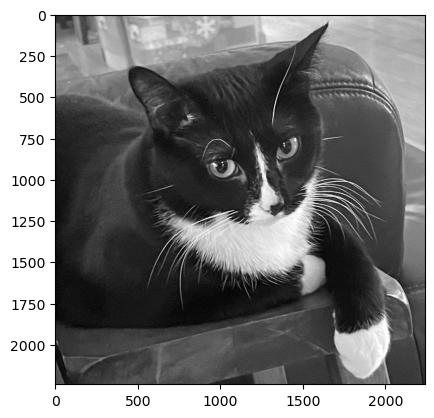

In [19]:
print("Original:")
imshow(egg_array, cmap="gray")

SVD compressed 100:


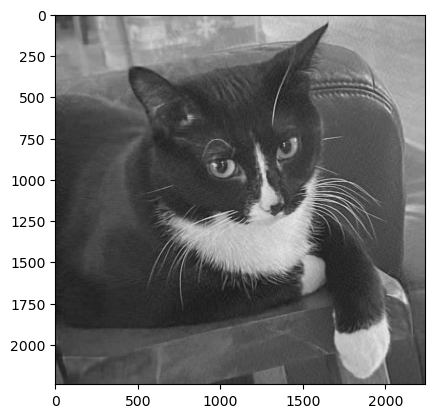

In [20]:
print("SVD compressed 100:")
imshow(arr_100, cmap="gray")

SVD compressed 50:


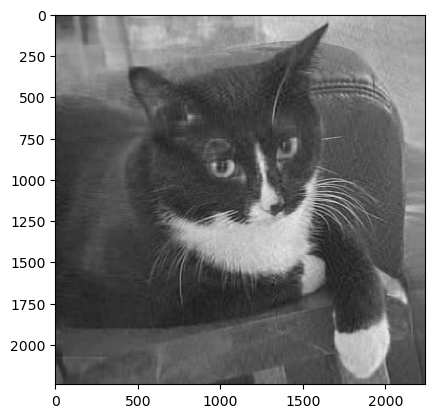

In [21]:
print("SVD compressed 50:")
imshow(arr_50, cmap="gray")

SVD compressed 10:


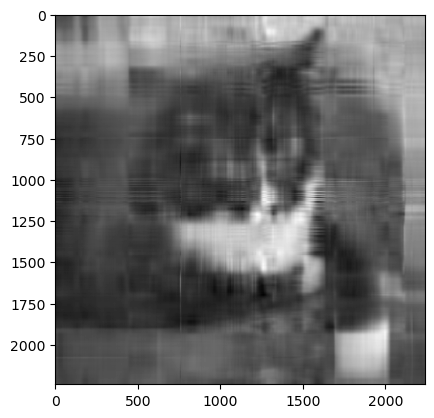

In [22]:
print("SVD compressed 10:")
imshow(arr_10, cmap="gray")

In [23]:
img = Image.open("val_gray.png").convert("L")
val_array = np.array(img)

In [24]:
# Use numpy's SVD algorithm and compute
U,S,V_T = np.linalg.svd(val_array, full_matrices=True)

# For 50, 20, 10, 5 terms used, compute the compressed image 
arr_50 = np.zeros(shape=val_array.shape)
for i in range(50):
    arr_50 += np.multiply.outer(U[:, i], V_T[i, :])*S[i]

arr_20 = np.zeros(shape=val_array.shape)
for i in range(20):
    arr_20 += np.multiply.outer(U[:, i], V_T[i, :])*S[i]
    
arr_10 = np.zeros(shape=val_array.shape)
for i in range(10):
    arr_10 += np.multiply.outer(U[:, i], V_T[i, :])*S[i]
    
arr_5 = np.zeros(shape=val_array.shape)
for i in range(5):
    arr_5 += np.multiply.outer(U[:, i], V_T[i, :])*S[i]
    
print("Values for alpha at 200, 50, 20, 10, and 5th terms respectively: ", round(S[200],3), round(S[50],3), round(S[20],3), round(S[10],3), round(S[5],3))

Values for alpha at 200, 50, 20, 10, and 5th terms respectively:  3.022 165.809 379.725 626.37 1215.939


Original:


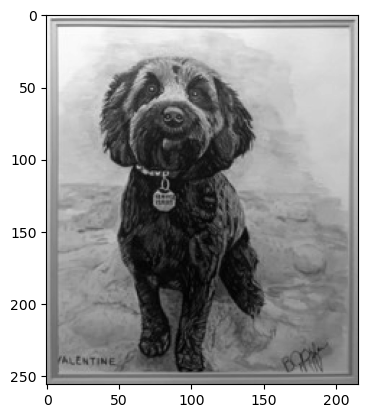

In [26]:
print("Original:")
imshow(val_array, cmap="gray")

SVD compressed 50:


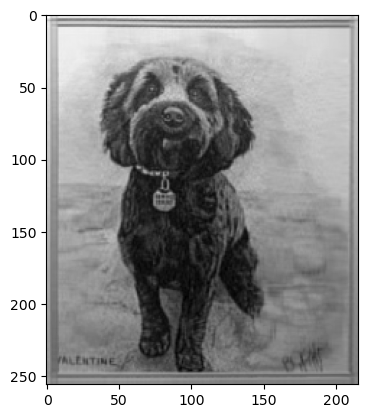

In [27]:
print("SVD compressed 50:")
imshow(arr_50, cmap="gray")

SVD compressed 20:


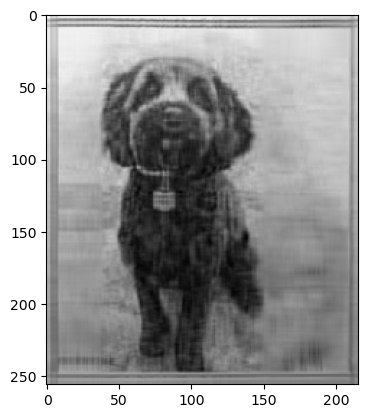

In [28]:
print("SVD compressed 20:")
imshow(arr_20, cmap="gray")

SVD compressed 10:


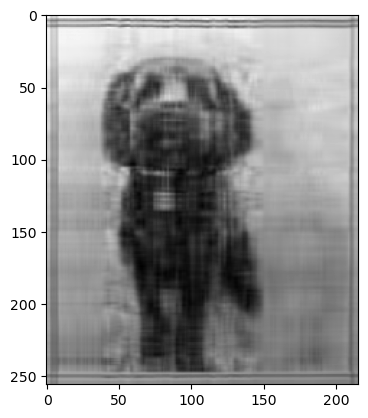

In [29]:
print("SVD compressed 10:")
imshow(arr_10, cmap="gray")

SVD compressed 5:


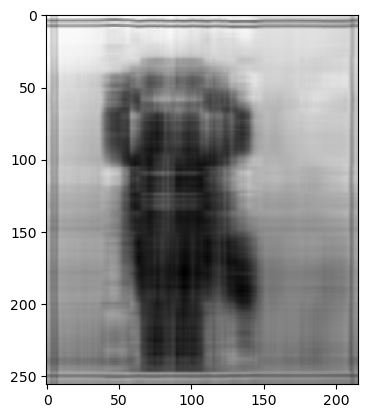

In [30]:
print("SVD compressed 5:")
imshow(arr_5, cmap="gray")